# IMPORTAÇÃO DOS DADOS

**Importando as bibliotecas**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Importando o dataset**

Dados obtidos no portal da transparência do senado, pode ser obtido [clicando aqui](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps).
>Ao importar os arquivos .csv, me deparei com o erro 'utf-8 codec can't decode byte 0xf3 in position 213: invalid continuation byte'.  
>Consegui resolver definindo o encoding para 'cp1252', não obtive sucesso com 'latin1' ou 'utf-8'.

In [76]:
ceaps_18 = pd.read_csv('data/despesa_ceaps_2018.csv', sep=';', header=1, encoding='cp1252')
ceaps_19 = pd.read_csv('data/despesa_ceaps_2019.csv', sep=';', header=1, encoding='cp1252')
ceaps_20 = pd.read_csv('data/despesa_ceaps_2020.csv', sep=';', header=1, encoding='cp1252')
ceaps_21 = pd.read_csv('data/despesa_ceaps_2021.csv', sep=';', header=1, encoding='cp1252')

**Unindo os datasets**

In [77]:
ceaps_unido = [ceaps_18, ceaps_19, ceaps_20, ceaps_21]
ceaps = pd.concat(ceaps_unido)
ceaps.reset_index(drop=True)
ceaps.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528


# ANÁLISE DOS DADOS

In [78]:
# Verifica o formato e o tipo dos dados
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77043 entries, 0 to 16826
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                77043 non-null  int64 
 1   MES                77043 non-null  int64 
 2   SENADOR            77043 non-null  object
 3   TIPO_DESPESA       77043 non-null  object
 4   CNPJ_CPF           77043 non-null  object
 5   FORNECEDOR         77043 non-null  object
 6   DOCUMENTO          73998 non-null  object
 7   DATA               77043 non-null  object
 8   DETALHAMENTO       48403 non-null  object
 9   VALOR_REEMBOLSADO  77043 non-null  object
 10  COD_DOCUMENTO      77043 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 7.1+ MB


**Verificando valores ausentes**

In [79]:
# Verifica a quantidade de valores ausentes
ceaps.isna().sum()

ANO                      0
MES                      0
SENADOR                  0
TIPO_DESPESA             0
CNPJ_CPF                 0
FORNECEDOR               0
DOCUMENTO             3045
DATA                     0
DETALHAMENTO         28640
VALOR_REEMBOLSADO        0
COD_DOCUMENTO            0
dtype: int64

In [80]:
# Verifica a porcentagem de valores ausentes
print('Valores ausentes na coluna Documento:', round((3045/77043)*100,2),'%')
print('Valores ausentes na coluna Detalhamento:', round((28640/77043)*100,2),'%')

Valores ausentes na coluna Documento: 3.95 %
Valores ausentes na coluna Detalhamento: 37.17 %


**Verificando valores ausentes como gráfico**

Text(0.5, 1.0, 'VALORES AUSENTES')

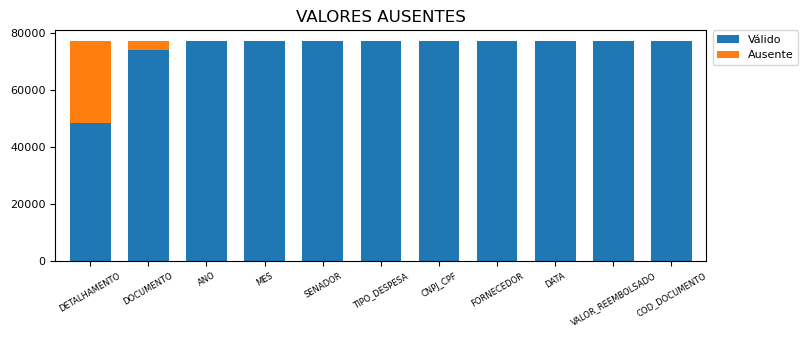

In [81]:
# Agrupa as quantidade de dados nulos e não nulos em um dataframe
ceaps_isnull = ceaps.isnull().sum()
ceaps_notnull = ceaps.notnull().sum()
ceaps_colunas = pd.DataFrame({'Válido':ceaps_notnull, 'Ausente':ceaps_isnull})

# Gráfico de barras
ax = ceaps_colunas.sort_values(by='Ausente',ascending =False).plot.bar(stacked=True, width=0.7, figsize = (12,3))

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.7, pos.height])
ax.legend(loc='right', prop={'size': 8}, bbox_to_anchor=(1.15, 0.925))

plt.xticks(fontsize=6, rotation=30)
plt.yticks(fontsize=8, rotation=0)
ax.set_title('VALORES AUSENTES')

**Verificando valores ausentes como tabela**

In [82]:
# Verificando visualmente os valores ausentes do campo DETALHAMENTO
ceaps[ceaps['DOCUMENTO'].isnull()].head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
303,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",002.756.358-80,JOSÉ ROBERTO MARQUES,NaN,30/01/2018,DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRI...,3500,2086180
304,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",011.763.248-10,JOSUÉ DIMAS DE MELO PIMENTA,NaN,01/02/2018,DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRI...,6766,2087011
306,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",46.392.130/0005-41,PREFEITURA DE SÃO PAULO,NaN,02/02/2018,IPTU DAS INSTALAÇÕES DO ESCRITÓRIO EM SÃO PAUL...,"787,69",2086996
333,2018,2,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",002.756.358-80,JOSÉ ROBERTO MARQUES,NaN,28/02/2018,DESPESA COM O ALUGUEL DAS INSTALAÇÕES DO ESCRI...,3500,2089926


In [83]:
# Verificando visualmente os valores ausentes do campo DETALHAMENTO
ceaps[ceaps['DETALHAMENTO'].isnull()].head()
#ceaps[['TIPO_DESPESA', 'FORNECEDOR', 'DETALHAMENTO']][ceaps['DETALHAMENTO'].isna()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI-DF,s/n,03/04/2018,NaN,35,2093667
677,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00369388,17/10/2018,NaN,"540,75",2108103
678,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00370358,29/10/2018,NaN,"1081,5",2108104
686,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00372106,26/11/2018,NaN,"551,05",2110145
687,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,00372806,28/11/2018,NaN,"1102,1",2110411


# MANIPULAÇÃO DOS DADOS

**Preenchendo valores ausentes**

In [84]:
ceaps['DETALHAMENTO'] = (
    ceaps['DETALHAMENTO'].fillna('N/D') # N/D = Não disponível
    .reset_index(drop=True)
)
ceaps = ceaps.drop(columns=['DOCUMENTO']) 

# ceaps['DOCUMENTO'] = (    
#     ceaps['DOCUMENTO'].fillna('S/N') #S/N = Sem número
#     .reset_index(drop=True)
#   )

In [85]:
# Verifica se os valores ausente foram preenchidos
ceaps.loc[ceaps['DETALHAMENTO'].str.contains('N/D', na=False)].head(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI-DF,03/04/2018,N/D,35,2093667
677,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,17/10/2018,N/D,"540,75",2108103
678,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,29/10/2018,N/D,"1081,5",2108104
686,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,26/11/2018,N/D,"551,05",2110145
687,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,28/11/2018,N/D,"1102,1",2110411


In [86]:
# Verifica se os valores ausente de DETALHAMENTO foram preenchidos
ceaps[['TIPO_DESPESA', 'FORNECEDOR', 'DETALHAMENTO']][ceaps['DETALHAMENTO'].isna()]

,TIPO_DESPESA,FORNECEDOR,DETALHAMENTO


In [87]:
# Visualiza se os valores ausentes de DETALHAMENTO estão preenchidos com N/D
ceaps.loc[ceaps['DETALHAMENTO'].str.contains('N/D', na=False)].head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,AÉCIO NEVES,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,SINTAXI-DF,03/04/2018,N/D,35,2093667
677,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,17/10/2018,N/D,"540,75",2108103
678,2018,10,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,29/10/2018,N/D,"1081,5",2108104
686,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,26/11/2018,N/D,"551,05",2110145
687,2018,11,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",07.686.368/0001-02,WTC - Sheraton,28/11/2018,N/D,"1102,1",2110411


In [88]:
# Visualiza se os valores ausentes de DOCUMENTO estão preenchidos com S/D
#ceaps.loc[ceaps['DOCUMENTO'].str.contains('S/N', na=False)].head()

**Formatando os dados**

In [89]:
# Verifica os fornecedores com a palavra S/A

ceaps.loc[ceaps['FORNECEDOR'].str.contains('S/A', na=False)].drop_duplicates(subset=['FORNECEDOR'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
121,2018,1,AÉCIO NEVES,Aquisição de material de consumo para uso no e...,19.207.588/0003-49,EDIMINAS S/A EDITORA GRAFICA INDUSTRIAL DE MIN...,29/08/2017,Assinatura de jornal.,"49,9",2086304
301,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",71.208.516/0119-66,ALGAR TELECOM S/A,03/01/2017,"DESPESA COM ADESÃO TV BANDA LARGA, TELEFONIA F...","252,61",2086179
308,2018,1,AIRTON SANDOVAL,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,VIVO TELEFÔNICA BRASIL S/A,18/01/2018,DESPESA COM TELEFONIA FIXA NAS INSTALAÇÕES DO ...,"21,21",2086990
311,2018,1,AIRTON SANDOVAL,Aquisição de material de consumo para uso no e...,33.014.556/0209-79,LOJAS AMERICANAS S/A,30/01/2018,DESPESA COM MATERIAL DE CONSUMO PARA USO NO ES...,"224,88",2086516
369,2018,3,AIRTON SANDOVAL,"Locomoção, hospedagem, alimentação, combustíve...",16.670.085/0571-81,LOCALIZA RENT A CAR S/A,27/03/2018,DESPESA COM LOCAÇÃO DE MEIOS DE TRANSPORTE.,"127,84",2092729
...,...,...,...,...,...,...,...,...,...,...
11593,2021,9,NILDA GONDIM,"Locomoção, hospedagem, alimentação, combustíve...",17.261.661/0047-56,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,03/09/2021,DESPESA COM COMBUSTÍVEL EM VEÍCULOS UTILIZADOS...,"143,6",2166463
12381,2021,6,PAULO ROCHA,"Locomoção, hospedagem, alimentação, combustíve...",04.895.751/0002-55,Y- YAMADA S/A COM.IND.,15/06/2021,Senador José Serra - Aquisição de combustível ...,"24,98",2162855
12823,2021,8,RANDOLFE RODRIGUES,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,Gol Linhas Aereas S/A,11/08/2021,Refeição.,"1900,37",2171516
14319,2021,10,SÉRGIO PETECÃO,"Locomoção, hospedagem, alimentação, combustíve...",05.298.154/0001-25,Windsor Barra Hotel S/A,25/10/2021,Despesa com imóvel político: pagamento de aluguel,"1524,11",2169819


In [90]:
ceaps.iloc[[40]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
40,2018,4,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",33.453.598/0217-16,RAIZEN COMBUSTÍVEIS S.A.,23/04/2018,despesa com aquisição de combustível para abas...,"2837,08",2094589


In [91]:
ceaps.FORNECEDOR.head()

0               GILBERTO PISELO DO NASCIMENTO
1    TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA
2    TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA
3    TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA
4               GILBERTO PISELO DO NASCIMENTO
Name: FORNECEDOR, dtype: object

In [92]:
# Formata os dados
ceaps['SENADOR'] = ceaps['SENADOR'].str.title() #Senador com primeira letra maiúsculo
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].str.title() #Fornecedor com primeira letra maiúsculo
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].replace('Ltda','LTDA.', regex=True)
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].replace(r'LTDA\..', 'LTDA.', regex=True)
ceaps['FORNECEDOR'] = ceaps['FORNECEDOR'].replace(' S A',' S.A.', regex=True)
ceaps.head(3)

#ceaps['DOCUMENTO'] = ceaps['DOCUMENTO'].replace('(?i)s\/n(.*)','S/N', regex=True) #Transforma s/n em S/N. (?i) ignora case-sensitive, s\/n busca por s/n, (.*) com qualquer caractere depois.

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,Acir Gurgacz,"Aluguel de imóveis para escritório político, c...",004.948.028-63,Gilberto Piselo Do Nascimento,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
1,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
2,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528


In [93]:
# Verifica se DETALHAMENTO contém 'n/d' em maíusculo
ceaps.loc[ceaps['DETALHAMENTO'].str.contains('N/D', na=False)].drop_duplicates(subset=['DETALHAMENTO'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
174,2018,4,Aécio Neves,"Locomoção, hospedagem, alimentação, combustíve...",07.424.109/0001-03,Sintaxi-Df,03/04/2018,N/D,35,2093667


In [94]:
# Verifica se DOCUMENTO contém 'n/d' em maiúsculo
#ceaps.loc[ceaps['DOCUMENTO'].str.contains('S/N', na=False)].drop_duplicates(subset=['DOCUMENTO'])

In [95]:
# Verifica se DOCUMENTO contém 's/n' em minúsculo
#ceaps.loc[ceaps['DOCUMENTO'].str.contains('s/n', na=False)].drop_duplicates(subset=['DOCUMENTO'])

In [96]:
# Verifica se FORNECEDER contém 'LTDA'
ceaps.loc[ceaps['FORNECEDOR'].str.contains('LTDA', na=False)].drop_duplicates(subset=['FORNECEDOR'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,2018,1,Acir Gurgacz,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,Transcontinental Agência De Viagens LTDA.,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
15,2018,3,Acir Gurgacz,"Contratação de consultorias, assessorias, pesq...",09.562.725/0001-48,"Marca - Texto, Produção & Arte LTDA.- Epp",05/03/2018,Prestação de serviço para transmissão de Audiê...,2200,2090397
118,2018,1,Aécio Neves,"Aluguel de imóveis para escritório político, c...",02.059.753/0001-06,Emive Patrulha 24 Horas LTDA.,03/01/2018,Vigilância patrimonial referente a janeiro de ...,"252,91",2087337
120,2018,1,Aécio Neves,Aquisição de material de consumo para uso no e...,14.298.003/0001-68,Diario Do Rio Doce LTDA.- Epp,30/08/2017,Assinatura de jornal.,6,2086302
122,2018,1,Aécio Neves,Aquisição de material de consumo para uso no e...,00.896.242/0001-05,Fibra Telecomunicações LTDA.,02/01/2018,Locação de equipamento telefônico.,"413,33",2088322
...,...,...,...,...,...,...,...,...,...,...
16751,2021,10,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",38.146.544/0002-10,Naval LTDA.,14/10/2021,N/D,80,2169624
16760,2021,11,Zequinha Marinho,"Locomoção, hospedagem, alimentação, combustíve...",01.174.530/0001-19,Auto Posto Rui Barbosa LTDA.,12/11/2021,N/D,"150,04",2170337
16768,2021,11,Zequinha Marinho,"Locomoção, hospedagem, alimentação, combustíve...",18.594.995/0001-21,Lc Silva LTDA.,05/11/2021,"Companhia Aérea: AZUL, Localizador: B9RNJC. Pa...",108,2169518
16771,2021,11,Zequinha Marinho,"Locomoção, hospedagem, alimentação, combustíve...",05.843.222/0001-90,Posto Barreirinhas LTDA.,05/11/2021,"Companhia Aérea: GOL, Localizador: ZDFKHB. Pas...",370,2169517


In [97]:
# Verifica se FORNECEDER contém 'S.A.'
ceaps.loc[ceaps['FORNECEDOR'].str.contains('S.A.', na=False)].drop_duplicates(subset=['FORNECEDOR'])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
14,2018,3,Acir Gurgacz,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,Oi Móvel S.A.,06/03/2018,Despesa com pagamento de telefonia para o escr...,"649,52",2091316
18,2018,3,Acir Gurgacz,"Locomoção, hospedagem, alimentação, combustíve...",33.453.598/0066-79,Raizen Combustíveis S.A.,16/03/2018,Despesa com aquisição de combustível para abas...,"2993,51",2092250
114,2018,1,Aécio Neves,"Aluguel de imóveis para escritório político, c...",18.007.971/0001-29,Asamar S.A.,02/02/2018,Referente ao aluguel - janeiro/2018.,7000,2087336
115,2018,1,Aécio Neves,"Aluguel de imóveis para escritório político, c...",40.432.544/0112-62,Claro S.A.,06/01/2018,"TV por assinatura, telefone e internet.","422,97",2088318
121,2018,1,Aécio Neves,Aquisição de material de consumo para uso no e...,19.207.588/0003-49,Ediminas S/A Editora Grafica Industrial De Min...,29/08/2017,Assinatura de jornal.,"49,9",2086304
...,...,...,...,...,...,...,...,...,...,...
8566,2021,4,José Serra,Aquisição de material de consumo para uso no e...,43.283.811/0061-90,Kalunga S.A.,07/04/2021,Despesa com energia elétrica para o escritório...,"62,7",2158140
9708,2021,11,Luis Carlos Heinze,"Locomoção, hospedagem, alimentação, combustíve...",87.392.320/0001-12,Curi S.A. Hoteis E Turismo - Curi Palace Hotel,13/11/2021,Despesa com serviço de táxi para o Senador.,220,2169911
12381,2021,6,Paulo Rocha,"Locomoção, hospedagem, alimentação, combustíve...",04.895.751/0002-55,Y- Yamada S/A Com.Ind.,15/06/2021,Senador José Serra - Aquisição de combustível ...,"24,98",2162855
15530,2021,7,Virginio De Carvalho,"Locomoção, hospedagem, alimentação, combustíve...",09.967.852/0061-68,Hotelaria Accor Brasil. S.A.,30/07/2021,"Companhia Aérea: AVIANCA, Localizador: JLXVS8....","2584,6",2168012


In [98]:
# Verifica se ainda resta valores ausentes
ceaps.isna().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
dtype: int64

**Formatando o tipo de despesa**

In [99]:
# Verifica quais TIPO_DESPESA existem
ceaps[['TIPO_DESPESA']].drop_duplicates()

,TIPO_DESPESA
0,"Aluguel de imóveis para escritório político, c..."
1,"Passagens aéreas, aquáticas e terrestres nacio..."
5,Divulgação da atividade parlamentar
15,"Contratação de consultorias, assessorias, pesq..."
18,"Locomoção, hospedagem, alimentação, combustíve..."
120,Aquisição de material de consumo para uso no e...
4226,Serviços de Segurança Privada


In [100]:
# Renomeia o TIPO_DESPESA para ficar consistente ao canal de transparência dos senadores individuais
# Exemplo: https://www6g.senado.leg.br/transparencia/sen/5985/?ano=2022

ceaps['TIPO_DESPESA'] = ceaps['TIPO_DESPESA'].replace({'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.':'Aluguel de imóveis para escritório político',
       'Divulgação da atividade parlamentar': 'Divulgação da atividade parlamentar',
       'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens aéreas, aquáticas e terrestres nacionais',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem, alimentação e combustíveis',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratação de serviços de apoio ao parlamentar ',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Aquisição de material de consumo ',
       'Serviços de Segurança Privada': 'Serviços de Segurança Privada '})

In [101]:
ceaps[['TIPO_DESPESA']].drop_duplicates()

,TIPO_DESPESA
0,Aluguel de imóveis para escritório político
1,"Passagens aéreas, aquáticas e terrestres nacio..."
5,Divulgação da atividade parlamentar
15,Contratação de serviços de apoio ao parlamentar
18,"Locomoção, hospedagem, alimentação e combustíveis"
120,Aquisição de material de consumo
4226,Serviços de Segurança Privada
